In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
M_earth  = 5.9742412e+24 # kg
R_earth  = 6371010.0 # m
G        = 6.67384e-11 # m^3 / kg s^2
g        = G*M_earth/R_earth**2

In [3]:
M      = M_earth
r0     = R_earth
v0     = 1e-8
a0     = 1.850*g
dt     = 1.0
theta  = 18.0/180*pi
t_meco = 529

In [4]:
t = 0.0
x = asarray([r0,0,0])
v = asarray([v0*cos(theta),v0*sin(theta),0])

all_t = []
all_x = []
all_v = []
all_a = []

uz = asarray([0,0,1])

while t<10*90*60:
    r = norm(x)
    ux = x/r
    ut = cross(uz,ux)
    uv = v/norm(v)

#    a = -G*M/r**2*ux + (a0 if t<800 else 0.0)*((ux*cos(t0)+ut*sin(t0)) if t<100 else uv)
    at = 0
    if(t < t_meco): at = a0
    a = -G*M/r**2*ux + at*((ux*cos(theta)+ut*sin(theta)) if t<100 else uv)
    v += a*dt
    x += v*dt
    t += dt

    all_a.append(a.copy())
    all_v.append(v.copy())
    all_x.append(x.copy())
    all_t.append(t)

all_t = asarray(all_t)
all_x = column_stack(all_x)
all_v = column_stack(all_v)
all_a = column_stack(all_a)

print(t_meco, (min(norm(all_x,axis=0)[all_t>t_meco])-R_earth)/1e3, (max(norm(all_x,axis=0))-R_earth)/1e3)

529 255.339477703 296.094368489


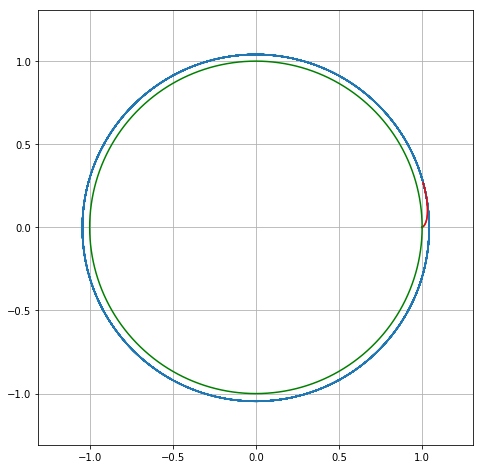

In [5]:
figure(figsize(8,8))
plot(all_x[0,:]/R_earth, all_x[1,:]/R_earth)
plot(all_x[0,all_t<t_meco]/R_earth, all_x[1,all_t<t_meco]/R_earth,'r-')
plot(cos(frange(0,360,1)/180*pi),sin(frange(0,360,1)/180*pi),'g-')
axis('square')
axis(asarray([-1,1,-1,1])*max(norm(all_x, axis=0))/R_earth*1.25)
grid()
#axis([-5,5,-5,5])

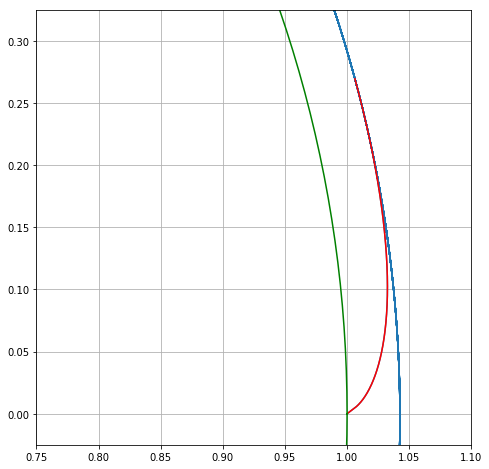

In [6]:
figure(figsize(8,8))
plot(all_x[0,:]/R_earth, all_x[1,:]/R_earth)
plot(all_x[0,all_t<t_meco]/R_earth, all_x[1,all_t<t_meco]/R_earth,'r-')
plot(cos(frange(0,360,1)/180*pi),sin(frange(0,360,1)/180*pi),'g-')
axis('square')
axis([0.75,1.10,-.025,.325])
grid()

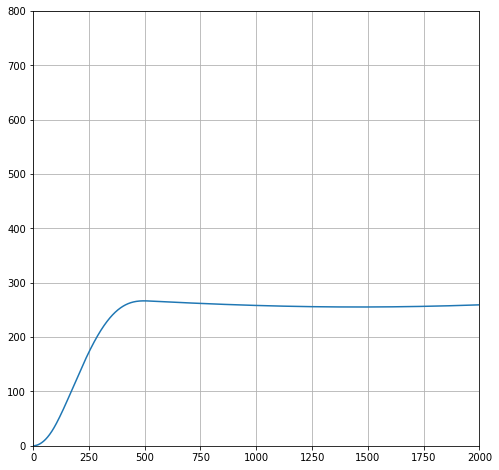

In [7]:
figure(figsize(8,8))
plot(all_t, (norm(all_x,axis=0)-R_earth)/1e3)
axis([0,2000,0,800])
grid()